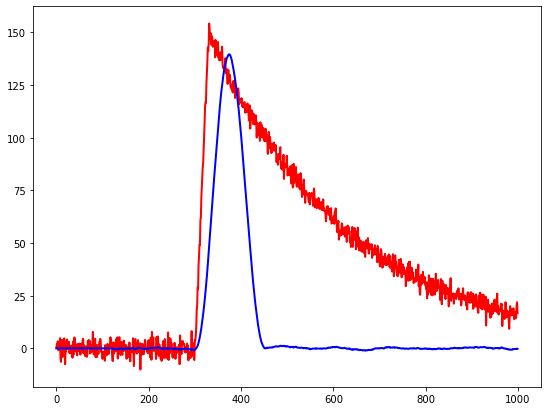

In [1]:
# Basic functionality

import numpy as np
import math
import setup
import matplotlib.pyplot as plt

# Trapezoidal filter ---------------------------------------
def trapFilter(data, tGap, tPeaking, tau):
    dataFiltered = [0]*len(data)
    for k in range(2*tPeaking + tGap - 1, len(data)):
        before = sum( data[i]*math.exp(-(tPeaking + tGap)/tau) for i in range(k-2*tPeaking-tGap+1, k-tPeaking-tGap+1) )
        after =  sum( data[i] for i in range(k-tPeaking+1, k+1) )
        dataFiltered[k] = (-before + after)/tPeaking
    return dataFiltered

plt.rcParams['figure.figsize'] = [20, 7]
plt.subplot(121)

data = setup.signalConstruction()   
plt.plot(data, 'r', lw=2)

dataFiltered = trapFilter(data, tGap = 24, tPeaking= 50, tau = 300)
plt.plot(dataFiltered, 'b', lw=2)

plt.show()

* $t_{Gap}$ is the length of the rise time. It is better to be above than below.
* $t_{Peaking}$ should be long enough to average out the noise. Too long and there could be pile-up issues.
* $\tau$ is important to get the baseline correction right.

As seen below, a low resolution does not guarantee the right parameters (correct $\tau$=30)! 
Good parameters guarantee a correct charge collection but since this is not known the best one can do is to select the best parameters based on the waveform.

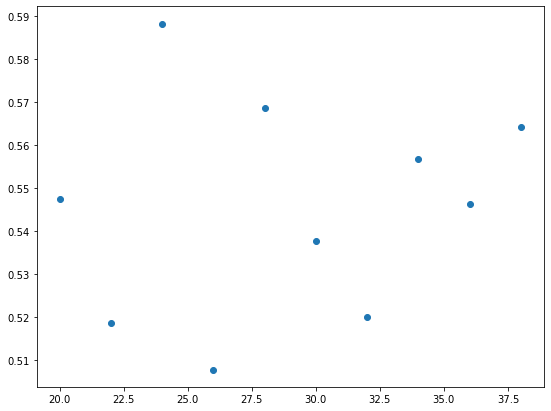

In [2]:
# MC single pulse + noise filter optimization

numMC = 200

tGapGrid = [i for i in range(20, 40, 2)]

res = []
for tGap in tGapGrid:
    tmp = []
    for i in range(numMC):
        data = setup.signalConstruction()   
        dataFiltered = trapFilter(data, tGap, tPeaking= 50, tau = 300)
        tmp.append(max(dataFiltered))
    res.append( np.asarray(tmp).std() )

plt.rcParams['figure.figsize'] = [20, 7]
plt.subplot(121)
plt.scatter(tGapGrid, res)
plt.show()